In [1]:
#why has Yammer (social network for communicating with coworkers) dropped in Sept relative to a peak in August?

In [2]:
#hypothesis:
#1 starting charging?
#2 change in employee # ? layoffs? fired? vacation?
#3 

In [ ]:
#plot count users per day (event data)

In [32]:
#events
import pandas as pd

df_events = pd.read_csv('yammer_events.csv')
print(df_events.shape)
df_events.head(5)

(340832, 7)


,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [22]:
#missing values
df_events.isnull().sum().sort_values(ascending = False)

user_type      15577
device             0
location           0
event_name         0
event_type         0
occurred_at        0
user_id            0
dtype: int64

In [23]:
#users
df_users = pd.read_csv('yammer_users.csv')
print(df_users.shape)
df_users.head(5)

(19066, 6)


,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [24]:
#missing values
df_users.isnull().sum().sort_values(ascending = False)

activated_at    9685
state              0
language           0
company_id         0
created_at         0
user_id            0
dtype: int64

In [25]:
#emails
import pandas as pd

df_emails = pd.read_csv('yammer_emails.csv')
print(df_emails.shape)
df_emails.head(5)

(90389, 4)


,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [26]:
#missing values
df_emails.isnull().sum().sort_values(ascending = False)

user_type      0
action         0
occurred_at    0
user_id        0
dtype: int64

In [34]:
#number of unique users overall time of datafram count
count = df_events['user_id'].nunique()
count

9760

In [43]:
df_events['day'] = pd.to_datetime(df_events['occurred_at']).dt.floor('d')
df_events['day'].head(5)

0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: day, dtype: datetime64[ns]

In [40]:
series = df_events.groupby('day').aggregate({'user_id' : 'nunique'})

In [41]:
import matplotlib.pyplot as plt 

%matplotlib inline

/Users/edwinreyes/miniconda3/envs/insightproject/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


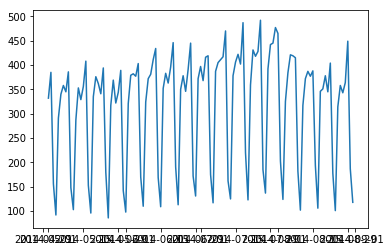

In [42]:
plt.plot(
    series.index,
    series.values
)

In [ ]:
#sorry been a long week and this is all I could get
#I know it's really incomplete and late